In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
stroke_data.duplicated().sum()

0

In [5]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

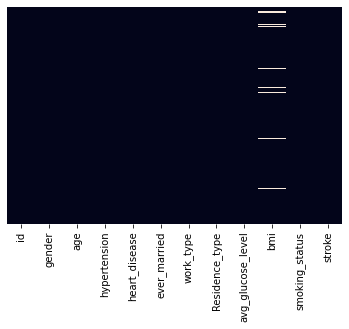

In [6]:
sns.heatmap(stroke_data.isnull(), cbar=False, yticklabels=False)

In [7]:
stroke_data['bmi'].isnull().sum() / len(stroke_data) * 100

3.9334637964774952

It seems that there is 201 bmi data that is missing. However it is only roughly 4 percent of the data that is missing

In [8]:
stroke_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [9]:
stroke_data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


## Exploratory Data Analysis

<AxesSubplot:xlabel='stroke', ylabel='count'>

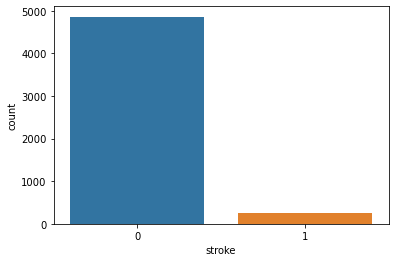

In [10]:
sns.countplot(x=stroke_data['stroke'])

In [11]:
stroke_data['stroke'].value_counts()[1] / len(stroke_data['stroke'])

0.0487279843444227

As seen above, the data is imbalance with the stroke patients consisting of only 4.9% of the dataset

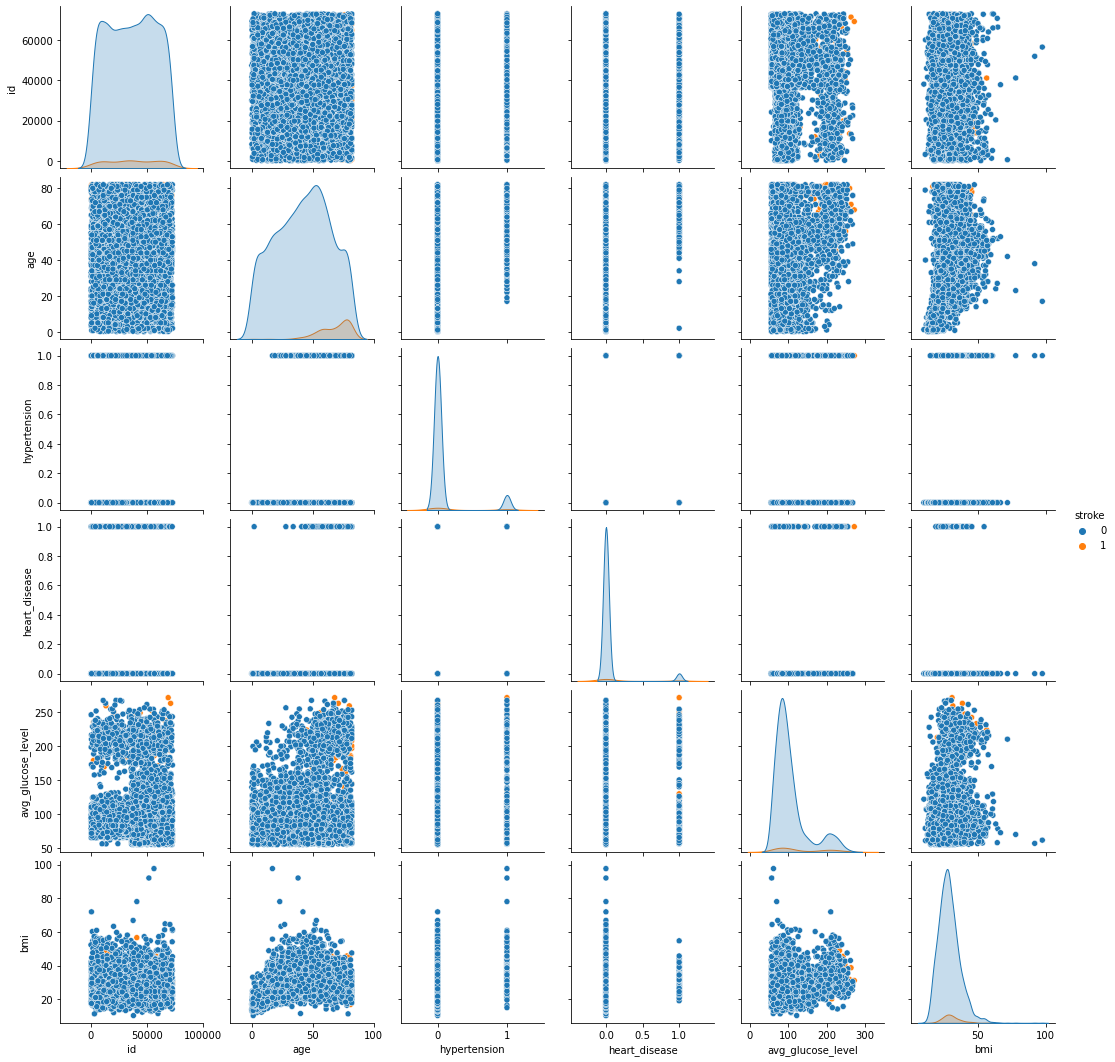

In [12]:
sns.pairplot(stroke_data, hue='stroke')

From above, we can hardly see any separation between the 2 labels

<AxesSubplot:>

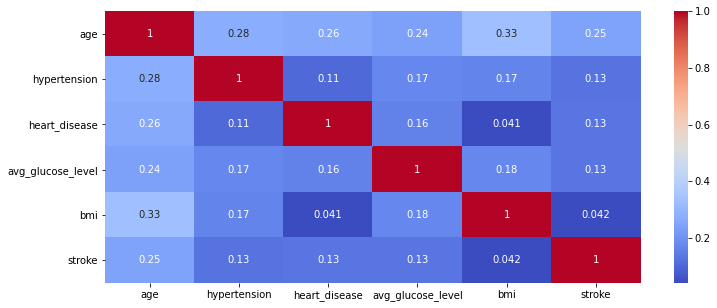

In [13]:
plt.figure(figsize=(12,5))
sns.heatmap(stroke_data.drop('id', axis=1).corr(), cmap='coolwarm', annot=True)

<AxesSubplot:xlabel='stroke', ylabel='age'>

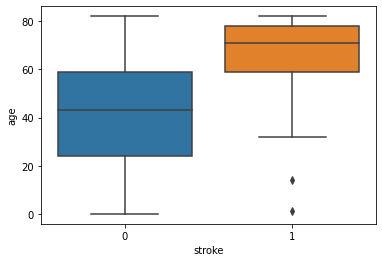

In [14]:
sns.boxplot(x='stroke', y='age',data=stroke_data)

People with stroke tend to be older and have a higher average median age

In [15]:
stroke_data.dtypes[stroke_data.dtypes == 'float64']

age                  float64
avg_glucose_level    float64
bmi                  float64
dtype: object

<AxesSubplot:xlabel='bmi', ylabel='Count'>

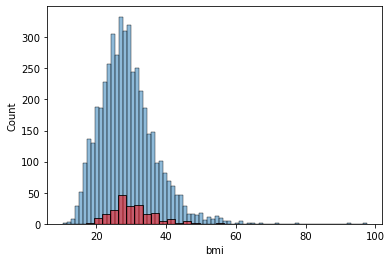

In [16]:
sns.histplot(x='bmi', data=stroke_data[stroke_data['stroke'] == 0], alpha=0.5)
sns.histplot(x='bmi', data=stroke_data[stroke_data['stroke'] == 1], alpha=0.5, color='r')

It seems the distribution of the bmi level of both stroke patients and non-stroke patients are similar

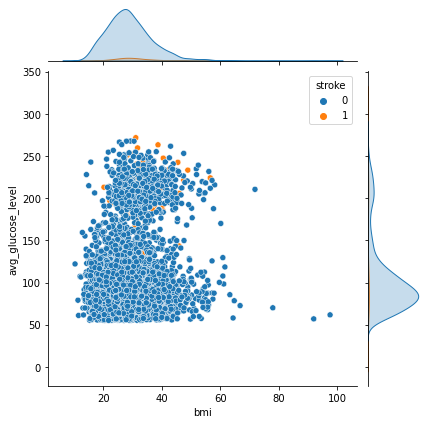

In [17]:
sns.jointplot(x='bmi', y='avg_glucose_level', data=stroke_data, hue='stroke')

Once again it is hard to discern the separation between the labels. However, it seems that people with stroke tend to have higher average glucose level

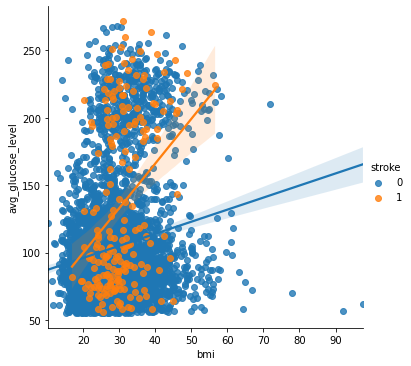

In [18]:
sns.lmplot(x='bmi', y='avg_glucose_level', data=stroke_data, hue='stroke')

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

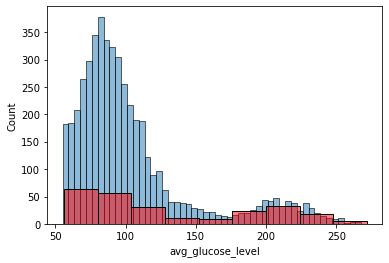

In [19]:
sns.histplot(x='avg_glucose_level', data=stroke_data[stroke_data['stroke'] == 0], alpha=0.5)
sns.histplot(x='avg_glucose_level', data=stroke_data[stroke_data['stroke'] == 1], alpha=0.5, color='r')

This shows that the average glucose level for both the stroke and non-stroke patients are similarly distributed

In [20]:
stroke_data.dtypes == 'int64'

id                    True
gender               False
age                  False
hypertension          True
heart_disease         True
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke                True
dtype: bool

<AxesSubplot:xlabel='work_type', ylabel='count'>

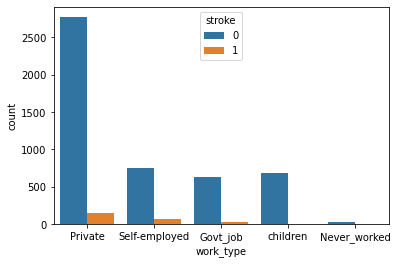

In [21]:
sns.countplot(x='work_type', data=stroke_data, hue='stroke')

<AxesSubplot:>

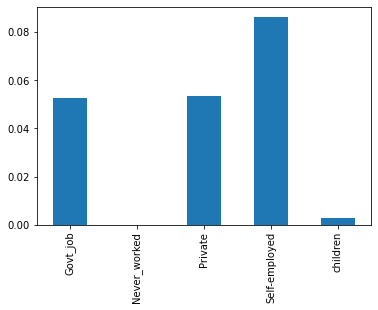

In [22]:
work_type_proportion = stroke_data[stroke_data['stroke'] == 1]['work_type'].value_counts() / stroke_data[stroke_data['stroke'] == 0]['work_type'].value_counts()
work_type_proportion.plot(kind='bar')

Above chart shows that there is a bigger proportion of stroke patients over normal patients in the self-employed category

<AxesSubplot:xlabel='gender', ylabel='count'>

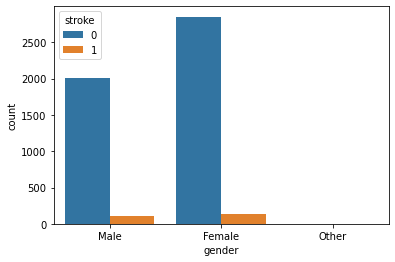

In [23]:
sns.countplot(x='gender', data=stroke_data, hue='stroke')

<AxesSubplot:>

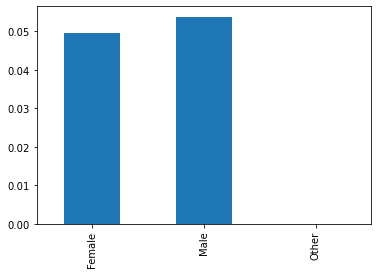

In [24]:
gender_stroke_proportion = stroke_data[stroke_data['stroke'] == 1]['gender'].value_counts() / stroke_data[stroke_data['stroke'] == 0]['gender'].value_counts()
gender_stroke_proportion.plot(kind='bar')

From the above, the proportion of stroke patients over non-stroke patients for both gender seems more or less equal

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

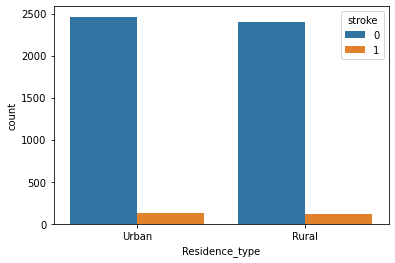

In [25]:
sns.countplot(x='Residence_type', data=stroke_data, hue='stroke')

Again, looking at the chart, it seems the proportion of stroke to non-stroke for both residence are similar

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

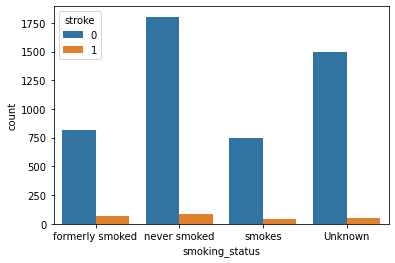

In [26]:
sns.countplot(x='smoking_status', data=stroke_data, hue='stroke')

<AxesSubplot:>

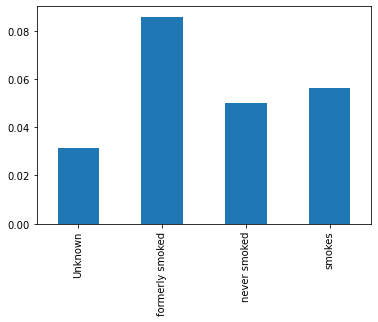

In [27]:
smoking_stroke_proportion = stroke_data[stroke_data['stroke'] == 1]['smoking_status'].value_counts() / stroke_data[stroke_data['stroke'] == 0]['smoking_status'].value_counts()
smoking_stroke_proportion.plot(kind='bar')

Judging from above, there tends to be a higher proportion of stroke over non-stroke patients for patients who formerly smoked

## Preprocessing

First of all, we don't need the 'id' column as it does not represent anything relevant. Thus we will drop it

In [28]:
stroke_data.drop('id', axis=1, inplace=True)

In [29]:
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Since there is only 1 'Other', we will drop this

In [30]:
stroke_data.drop(stroke_data[stroke_data['gender'] == 'Other'].index, inplace=True)

In [31]:
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [32]:
stroke_data = pd.get_dummies(data=stroke_data, columns=['gender'], drop_first=True)
stroke_data

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male
0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0
2,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
3,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
4,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,0
5106,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0
5107,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0
5108,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,1


In [33]:
stroke_data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [34]:
stroke_data = pd.get_dummies(data=stroke_data, columns=['Residence_type'], drop_first=True)


In [35]:
stroke_data.head(5)

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,Residence_type_Urban
0,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1,1,1
1,61.0,0,0,Yes,Self-employed,202.21,NaN,never smoked,1,0,0
2,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1,1,0
3,49.0,0,0,Yes,Private,171.23,34.4,smokes,1,0,1
4,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1,0,0


In [36]:
stroke_data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [37]:
stroke_data = pd.get_dummies(data=stroke_data, columns=['ever_married'], drop_first=True)
stroke_data.head(5)

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,Residence_type_Urban,ever_married_Yes
0,67.0,0,1,Private,228.69,36.6,formerly smoked,1,1,1,1
1,61.0,0,0,Self-employed,202.21,NaN,never smoked,1,0,0,1
2,80.0,0,1,Private,105.92,32.5,never smoked,1,1,0,1
3,49.0,0,0,Private,171.23,34.4,smokes,1,0,1,1
4,79.0,1,0,Self-employed,174.12,24.0,never smoked,1,0,0,1


In [38]:
stroke_data['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [39]:
#replace all children and never_worked as other
stroke_data.loc[(stroke_data['work_type'] == 'children') | (stroke_data['work_type'] == 'Never_worked'), 'work_type' ] = 'Other'

In [40]:
stroke_data['work_type'].value_counts()

Private          2924
Self-employed     819
Other             709
Govt_job          657
Name: work_type, dtype: int64

In [41]:
stroke_data = pd.get_dummies(data=stroke_data, columns=['work_type'], drop_first=True)

In [42]:
stroke_data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [43]:
stroke_data = pd.get_dummies(data=stroke_data, columns=['smoking_status'], drop_first=True)

In [44]:
stroke_data.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,Residence_type_Urban,ever_married_Yes,work_type_Other,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,1,0,1,0,1,0,0
1,61.0,0,0,202.21,NaN,1,0,0,1,0,0,1,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,1,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,1,0


Now we have dealt with all the non-numerical data

### Outliers and missing data

In [45]:
stroke_data.describe()['bmi']

count    4908.00000
mean       28.89456
std         7.85432
min        10.30000
25%        23.50000
50%        28.10000
75%        33.10000
max        97.60000
Name: bmi, dtype: float64

In [46]:
IQR = stroke_data.describe()['bmi'].loc['75%'] - stroke_data.describe()['bmi'].loc['25%']
upper_boundary = stroke_data.describe()['bmi'].loc['75%'] + 1.5 * IQR 
upper_boundary

47.5

In [47]:
len(stroke_data[stroke_data['bmi'] > 47.5]['bmi'])

110

In [48]:
stroke_data['bmi'].median()

28.1

As the bmi was distributed almost similarly for both stroke and non-stroke and that missing values are only a small percentage to the total of values, and also since there are multiple outliers in the bmi data, we can fill the small missing values of bmi with the median

In [49]:
stroke_data['bmi'].fillna(stroke_data['bmi'].median(), inplace=True)

In [50]:
stroke_data.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Male                       0
Residence_type_Urban              0
ever_married_Yes                  0
work_type_Other                   0
work_type_Private                 0
work_type_Self-employed           0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [51]:
from sklearn.ensemble import IsolationForest

#check for any outliers first
temp = stroke_data.drop('stroke', axis=1)
outliers = IsolationForest(random_state=0).fit_predict(temp)
outliers_index = list(np.where(outliers == -1)[0])
print(f"Outlier Count: {len(outliers_index)} \nSample Count: {len(stroke_data)} \nFraction: {round(len(outliers_index)/len(stroke_data),3)}")

Outlier Count: 2212 
Sample Count: 5109 
Fraction: 0.433


As the outlier above is a huge fraction of the sample count, we will not remove this outliers as it is probably not outliers

## Upsampling

<AxesSubplot:xlabel='stroke', ylabel='count'>

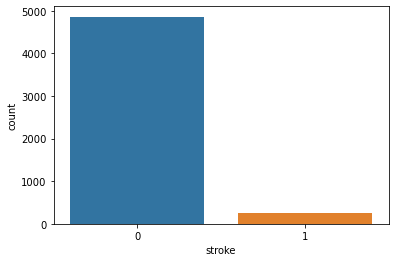

In [52]:
sns.countplot(x=stroke_data['stroke'])

As the amount of imbalance above is quite huge, we need to oversample the minority data, in this case the stroke patients

In [53]:
X,y = stroke_data.drop('stroke', axis=1), stroke_data['stroke']

In [54]:
from imblearn.over_sampling import SMOTE

In [58]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X,y)
print(f'shape before: {X.shape}')
print(f'shape before: {X_sm.shape}')

shape before: (5109, 14)
shape before: (9720, 14)


In [61]:
y_sm.value_counts()

1    4860
0    4860
Name: stroke, dtype: int64

As seen above, the data is now balanced after oversampling

## ML Application

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
print(X_train.max())
print(X_train.min())

1.0
0.0


### Using simple logistic regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
lr_model = LogisticRegression(random_state=42)

In [72]:
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [73]:
predictions = lr_model.predict(X_test)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [77]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[1265  193]
 [ 178 1280]]


              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1458
           1       0.87      0.88      0.87      1458

    accuracy                           0.87      2916
   macro avg       0.87      0.87      0.87      2916
weighted avg       0.87      0.87      0.87      2916



Not bad at all considering that we are using a simple logistic regression model

### Using Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dt_model = DecisionTreeClassifier(random_state=42)

In [80]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [81]:
dt_pred = dt_model.predict(X_test)

In [82]:
print(confusion_matrix(y_test, dt_pred))
print('\n')
print(classification_report(y_test, dt_pred))

[[1311  147]
 [ 108 1350]]


              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1458
           1       0.90      0.93      0.91      1458

    accuracy                           0.91      2916
   macro avg       0.91      0.91      0.91      2916
weighted avg       0.91      0.91      0.91      2916



### Using Random Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rfc_model = RandomForestClassifier(random_state=42)

In [85]:
rfc_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [86]:
rfc_pred = rfc_model.predict(X_test)

In [87]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[1364   94]
 [  63 1395]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1458
           1       0.94      0.96      0.95      1458

    accuracy                           0.95      2916
   macro avg       0.95      0.95      0.95      2916
weighted avg       0.95      0.95      0.95      2916



### Hyperparameter Tuning using Random Forest and GridSearchCV

In [90]:
from sklearn.model_selection import GridSearchCV

In [95]:
params = {
    'max_depth': [2,5,10,25,50,60,75,100],
    'min_samples_split': [1,2,5,10,20,25,50],
    'min_samples_leaf' : [1,2,4,5,10,20,50],
    'ccp_alpha': [0,0.1,0.01,0.001,0.0001],
}

In [96]:
clf_tree = GridSearchCV(RandomForestClassifier(), params, cv=3, n_jobs= -1, verbose=2)
clf_tree.fit(X_train, y_train)

C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.7920341  0.79835391 ... 0.85346855 0.85537919 0.85346855]
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.1, 0.01, 0.001, 0.0001],
                         'max_depth': [2, 5, 10, 25, 50, 60, 75, 100],
                         'min_samples_leaf': [1, 2, 4, 5, 10, 20, 50],
                         'min_samples_split': [1, 2, 5, 10, 20, 25, 50]})

In [97]:
print(f"tuning: {clf_tree.best_params_}")
print(f"best score is: {clf_tree.best_score_}")
print("Train Score {:.6f}".format(clf_tree.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf_tree.score(X_test,y_test)))

tuning: {'ccp_alpha': 0, 'max_depth': 100, 'min_samples_leaf': 1, 'min_samples_split': 2}
best score is: 0.9404761904761906
Train Score 1.000000
Test Score 0.946502


In [98]:
clf_tree_pred = clf_tree.predict(X_test)

In [99]:
print(confusion_matrix(y_test, clf_tree_pred))
print('\n')
print(classification_report(y_test, clf_tree_pred))

[[1365   93]
 [  63 1395]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1458
           1       0.94      0.96      0.95      1458

    accuracy                           0.95      2916
   macro avg       0.95      0.95      0.95      2916
weighted avg       0.95      0.95      0.95      2916



In [100]:
y_score = clf_tree.predict_proba(X_test)[:,1]

In [101]:
y_score

array([0.03, 0.04, 0.34, ..., 0.6 , 0.98, 0.05])

In [112]:
false_positive3, true_positive3, threshold3 = roc_curve(y_test, y_score)
roc_curve_area = roc_auc_score(y_test, y_score)

<AxesSubplot:title={'center':'Receiver Operating Characteristic - Random Forest Classifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

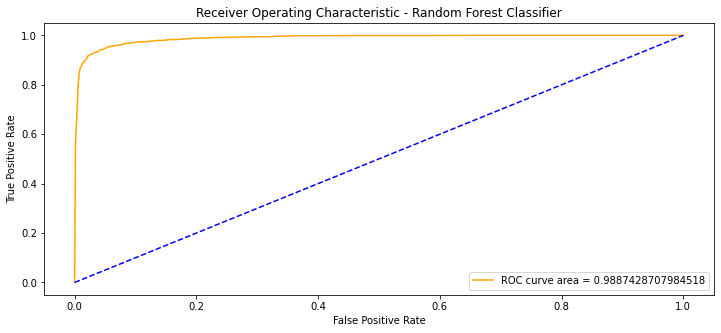

In [115]:
plt.figure(figsize=(12,5))
sns.lineplot(x=false_positive, y=true_positive, color='orange', label='ROC curve area = {}'.format(roc_curve_area)).set(title='Receiver Operating Characteristic - Random Forest Classifier', xlabel='False Positive Rate', ylabel='True Positive Rate')
sns.lineplot(x=false_positive, y=false_positive, color='blue', ls='--')



In [116]:
import pickle

In [117]:
filename = 'finalized_rfc_stroke_model.sav'
pickle.dump(clf_tree, open(filename, 'wb'))

### Using XGBoost and GridSearchCV

In [119]:
from xgboost.sklearn import XGBClassifier

In [120]:
xgb_params = {
    'max_depth': [1,2,5,10,20,40],
    'min_child_weight': [0.1,0.5,1,2],
    'learning_rate': [0.0001,0.001,0.01,1],
    'n_estimators': [0,5,10,50,100,200],
    'gamma':[0,0.1,0.5,1],
    'reg_lambda':[0,0.1,0.01,0.001]
}

In [122]:
clf_xgb = GridSearchCV(XGBClassifier(), xgb_params, n_jobs=-1, cv=3).fit(X_train,y_train)

C:\Users\Fujitsu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:58:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [123]:
clf_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=5,
              min_child_weight=0.1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [142]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': clf_xgb.best_estimator_.feature_importances_}).sort_values(by='importance',ascending=False)

<AxesSubplot:xlabel='importance', ylabel='feature'>

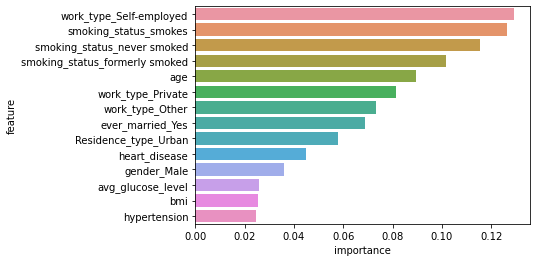

In [145]:
sns.barplot(y='feature', x='importance',data=feature_importance)

In [147]:
xgb_pred = clf_xgb.predict(X_test)

C:\Users\Fujitsu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [148]:
print(confusion_matrix(y_test, xgb_pred))
print('\n')
print(classification_report(y_test, xgb_pred))

[[1377   81]
 [  66 1392]]


              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1458
           1       0.95      0.95      0.95      1458

    accuracy                           0.95      2916
   macro avg       0.95      0.95      0.95      2916
weighted avg       0.95      0.95      0.95      2916



In [149]:
xgb_pred_score = clf_xgb.predict_proba(X_test)[:,1]

C:\Users\Fujitsu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [150]:
false_positive, true_positive, threshold = roc_curve(y_test, xgb_pred_score)
roc_curve_area = roc_auc_score(y_test, xgb_pred_score)

<AxesSubplot:title={'center':'ROC - XGBoost Model'}, xlabel='False Positive', ylabel='True Positive'>

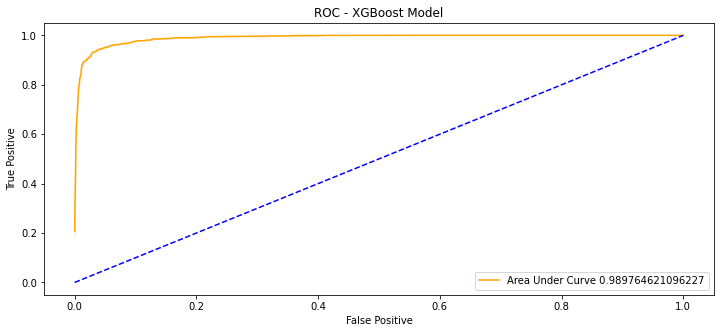

In [155]:
plt.figure(figsize=(12,5))
sns.lineplot(x=false_positive, y=true_positive, color='orange', label='Area Under Curve {}'.format(roc_curve_area)).set(title='ROC - XGBoost Model', ylabel='True Positive', xlabel='False Positive')
sns.lineplot(x=[0,1], y=[0,1], color='blue', ls='--')

In [156]:
#saving model
filename = 'xgb_stroke_model.pkl'
pickle.dump(clf_xgb, open(filename, 'wb'))